# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308 Machine Learning Lab </center>
## <center> Lab#5 Basic optimization techniques </center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.io import wavfile
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 
import copy

## <font color='red'> **Problem 1)** 
Find minima of following functions using gradient descent method with learning rate 0.01 and 0.1 along with different number of iterations. Try choosing a large value of learning rate and test the convergence. Plot the functions, highlight corresponding minima, and show convergence/divergence on the plot.

(a) $L_1(θ) = θ^2$

(b) $L_2(θ) = θ_1^2 + θ_2^2$

(c) $L_3(θ) = (θ - 1)^2$

(d) $L_4(θ) = 2 (θ_1-1)^2 + 2(θ_2-1)^2$


theta:  4.871862228969798e-05
iterations: 1255


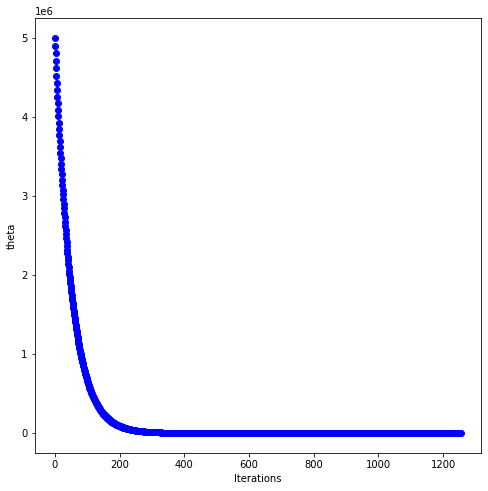

In [ ]:
theta = 5000000 # Initial value
previous_theta = theta - 1
e = 0.000001 # Accuracy 
alpha = 0.01 # Learning rate 


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel("Iterations")
ax.set_ylabel("theta")

iteration_count = 0
while abs(previous_theta - theta) > e and iteration_count < 10000:
    # Derivative of L1(theta)= 2*theta
    step_size = 2 * theta * alpha
    ax.scatter(iteration_count, theta, c='b')
    previous_theta = theta
    theta = theta - step_size
    iteration_count += 1

print("theta: ",theta)
print("iterations:",iteration_count) 

Q1 (b)


theta0:  6.67495948725285e-07 theta1:  3.3374797436264246e-06
iterations: 105


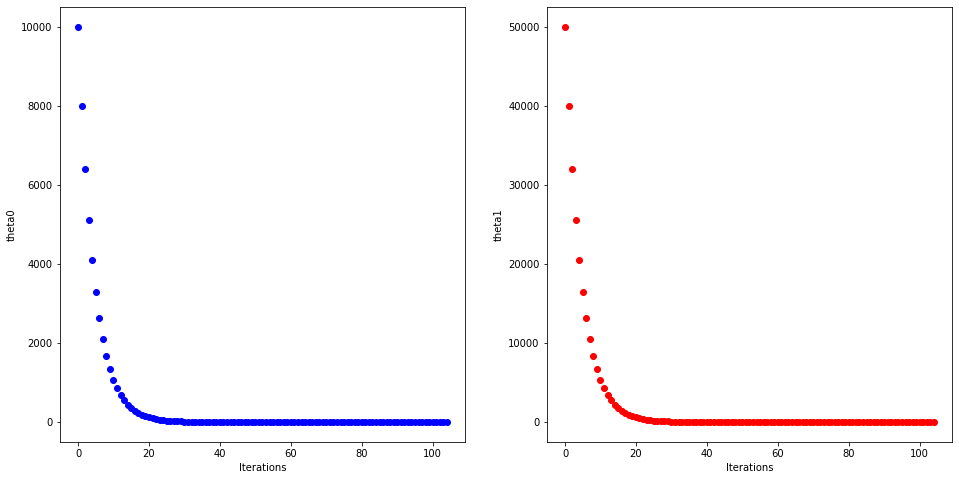

In [ ]:
# Initial value
theta0 = 10000
theta1 = 50000
e = 0.000001 # Accuracy
alpha = 0.1 # Learning rate

# can use while loop for |theta0-p0|>e or |theta1-p1|>e:
theta = np.array(([[theta0],[theta1]]))
previous_theta = theta - 1

fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("theta0")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("theta1")

iteration_count = 0
while (abs(theta - previous_theta) > e).any() and iteration_count < 1500:
  # Derivative of L1(theta) = 2*(theta0+theta1)
  step_size = 2*theta*alpha
  ax[0].scatter(iteration_count ,theta[0],c='b')
  ax[1].scatter(iteration_count ,theta[1],c='r')
  
  previous_theta = copy.deepcopy(theta)
  theta = theta - step_size
  iteration_count += 1
    
print("theta0: ",theta[0][0],"theta1: ",theta[1][0])
print("iterations:",iteration_count) 

Q1 (c)

theta:  1.0000033025934667
iterations: 74


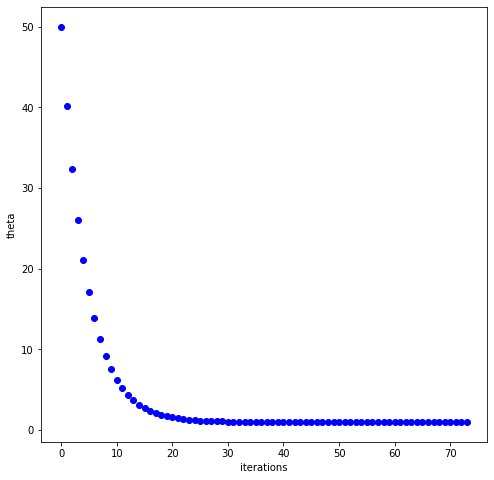

In [ ]:
theta = 50 # Initial value
previous_theta = theta + 1
e = 0.000001 # Accuracy
alpha = 0.1 # Learning Rate

# while for |theta0-p|>e:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set_xlabel("iterations")
ax.set_ylabel("theta")

iteration_count = 0
while abs(previous_theta-theta)>e and iteration_count<10000:
  # Derivative of L1(theta)= 2*(theta-1)
  step_size = 2*(theta-1)*alpha
  ax.scatter(iteration_count,theta,c='b')
  previous_theta = theta
  theta = theta - step_size
  iteration_count += 1
    
print("theta: ",theta)
print("iterations:",iteration_count) 

Q1 (d)

theta0:  1.0000002245001247 theta1:  1.000001122590433
iterations: 48


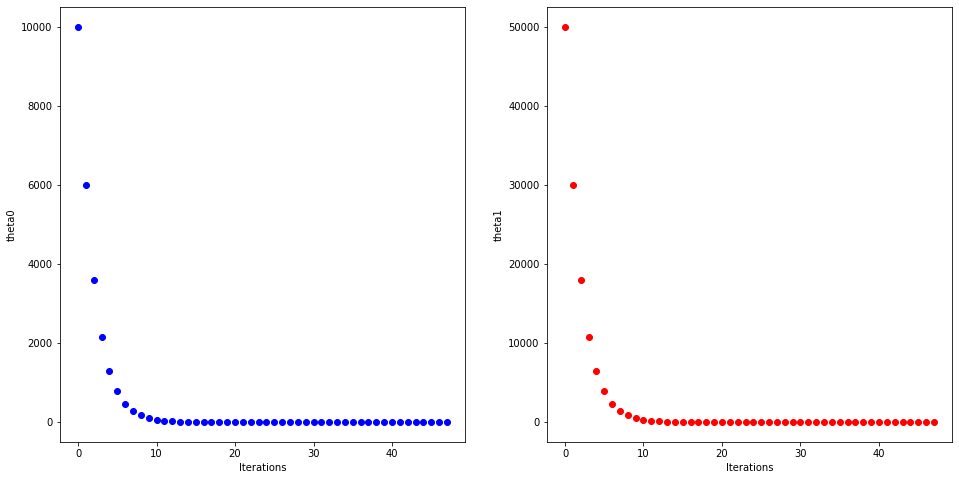

In [ ]:
theta0=10000
theta1=50000
e=0.000001
alpha=0.1

#while loop for |theta0-p0|>e or |theta1-p1|>e:
theta = np.array(([[theta0],[theta1]]))
previous_theta = theta + 1

fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("theta0")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("theta1")

iteration_count = 0
while (abs(theta-previous_theta)>e).any() and iteration_count<1500:
  step_size = (4*(theta-1))*alpha
  ax[0].scatter(iteration_count,theta[0],c='b')
  ax[1].scatter(iteration_count,theta[1],c='r')
  previous_theta = copy.deepcopy(theta)
  theta = theta - step_size
  iteration_count += 1


print("theta0: ",theta[0][0],"theta1: ",theta[1][0])
print("iterations:",iteration_count) 

## <font color='red'> **Problem 2)** 
Consider $A=\begin{bmatrix}
0.7 & 0.2\\
0.1 & 0.6
\end{bmatrix}$ and the observation matrix $b=\begin{bmatrix}
0.5\\
0.6
\end{bmatrix}$ in a system $Ax=b$. However, $b$ is not in column space of $A$, thus $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$. Using linear least square $x$ can be estimated by minimizing the mean squared error as,  $\min ||Ax-b||_2$. 

<br>
This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm. 

<br>

You need to solve this least square problem using gradient descent algortithm on $f(x)$.

<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>

Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new $x$ iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

x:  [[0.4499692 ]
 [0.92503944]]
iterations: 411


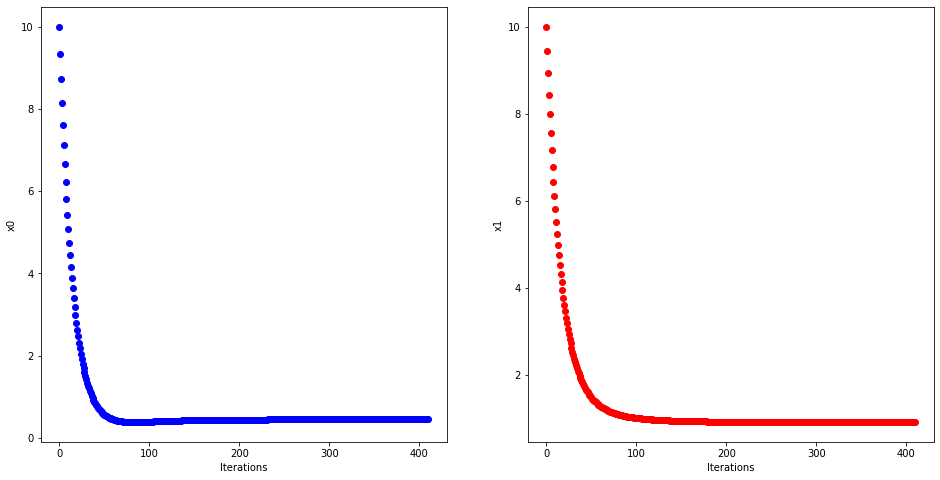

In [ ]:
#Write your code here.
alpha = 0.1
e = 0.000001
A = np.array([[0.7,0.2],[0.1,0.6]])
B = np.array([[0.5],[0.6]])

# Assumption
x = np.array(([[10],[10]]))
previous_x = x-1
ATA = (A.T).dot(A)

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("x0")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("x1")

iteration_count = 0
while (abs(x - previous_x) > e).any() and iteration_count<1000:
  previous_x = copy.deepcopy(x)
  ax[0].scatter(iteration_count,x[0],c='b')
  ax[1].scatter(iteration_count,x[1],c='r')
  x = x - (alpha * (ATA.dot(x)-(A.T).dot(B)))
  iteration_count += 1

fig.show()

print("x: ",x);
print("iterations:",iteration_count) 

## <font color='red'> **Problem 3)** 
Apply stochastic gradient algorithm on the given dataset and estimate $\theta_0$, $\theta_1$ and final cost value. Step by step hints have been given for the same.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.style.use(['ggplot'])

1) Dataset:

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

2) Visualize the data.

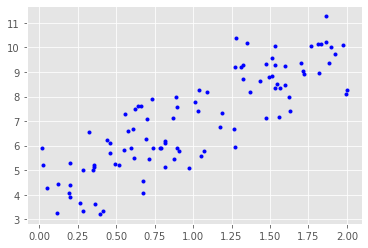

In [ ]:
#Write code here
plt.plot(X,y,'b.')
X = np.reshape(X,(len(X),1))
y = np.reshape(y,(len(y),1))

3) We will write the line equation $y=m \space x+c$ in machine learning form as $J(\theta)=\theta_1 X + \theta_0$. Now choose one random sample $X_b$ (you can concatenate ones and $X$) and find $\theta_{best} = (X_b^T X_b)^{-1}X_b^Ty$.

In [ ]:
#Write code here.
X_b = np.c_[np.ones((len(X),1)),X]
theta_best = np.linalg.inv(X_b.T@X_b) @ (X_b.T@y)
print(theta_best)

[[4.01786863]
 [3.01688254]]


4) For example choose $X_{new}=\begin{bmatrix}
0 \\
2 
\end{bmatrix}$. Obtain $X_{new_b}$ by concatinating ones and $X_{new}$. Finally find $y_{predict}=X_{new_b}\theta_{best}$.

In [ ]:
#Write code here.
X_new = np.matrix([[0],[2]])
X_new_b = np.c_[[[1],[1]],X_new]
y_predict = X_new_b@theta_best
print(y_predict)

[[ 4.01786863]
 [10.05163371]]


5) Visualize $X_{new}$ and $y_{predict}$.

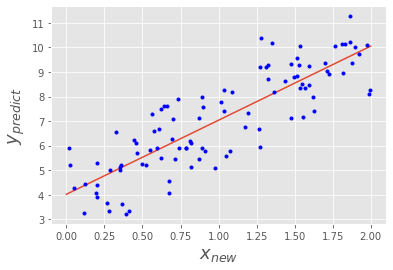

In [ ]:
#Write code here.
plt.plot(X_new,y_predict)
plt.plot(X,y,'b.')
plt.xlabel("$x_{new}$",fontsize=18)
plt.ylabel("$y_{predict}$", rotation=90,fontsize=18)
plt.show()

6) Define the cost function.

In [ ]:
def  cal_cost(theta,X,y):

    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    
    return cost

7) Define the gradient descent function.

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))

    for it in range(iterations):
      prediction = np.dot(X,theta)
      theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
      theta_history[it,:] =theta.T
      cost_history[it]  = cal_cost(theta,X,y)
      
    return theta, cost_history, theta_history

8) Using learning rate $0.01$ and $1000$ iterations find $\theta_0$, $\theta_1$ and final cost.

In [ ]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.758,
Theta1:          3.238
Final cost/MSE:  5683.309


9) Plot $J(\theta)$ and iterations.

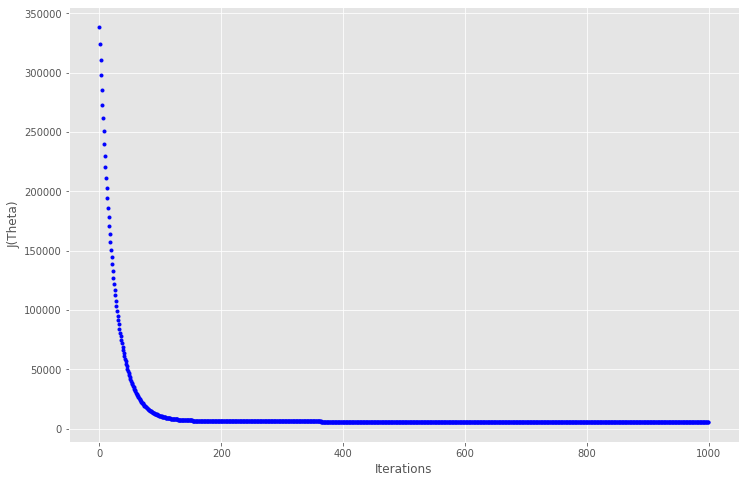

In [ ]:
#Write code here.
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(n_iter),cost_history,'b.')

10) You can also observe the changes in cost function.

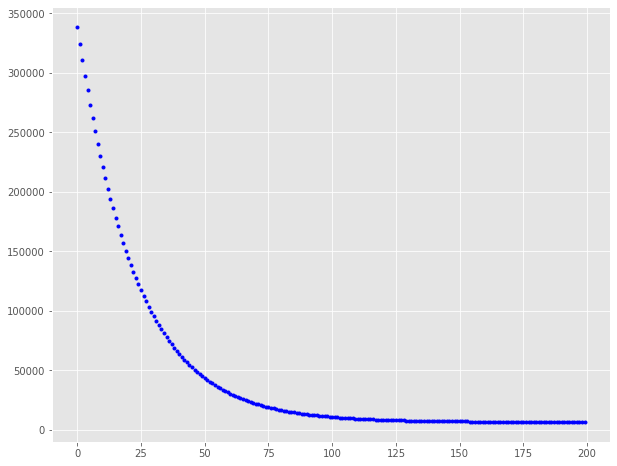

In [ ]:
#Write code here.
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200),cost_history[:200],'b.')

## <font color='red'> **Problem 4)** 
Find minimum of the function $L(θ)$ = using stochastic gradient descent method (take the data from the excel sheet given). Choose different learning rates and number of iterations.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import sympy as sy
from google.colab import files
uploaded = files.upload()

Saving SRUSHTI SHANKARBHAI RATHVA - data.csv to SRUSHTI SHANKARBHAI RATHVA - data.csv


In [ ]:
import random

def stepSize(x,y,theta,alpha):
  step_size=np.zeros((2,1))
  step_size[1]= alpha*(-2*(y-(theta[0]*x+theta[1])))
  step_size[0]= step_size[1]*x
  return step_size

#Read the excel sheet given
#x = np.array(df['x'])
#y = np.array(df['y'])
#noralize x

theta1 = 1000
theta2 = 500

eps = 1e-6
alpha = 0.01
cnt = 0

df = pd.read_csv("data.csv")
z = np.polyfit(np.array(df['x']),np.array(df['y']),1)
print(z)

X = np.array(df['x']).reshape(-1,1)
Y = np.array(df['y']).reshape(-1,1)
X = (X - np.mean(X))/np.std(X)
Y = (Y - np.mean(Y))/np.std(Y)

theta = np.array([[theta1],[theta2]])
previous_theta = theta+1

# use while loop for |prev1-theta1| >= eps or |prev2-theta2| >= eps:
iteration_count = 0
while (abs(theta-previous_theta)>eps).any() and iteration_count<1000:
  p = random.randint(0,93)
  x = X[p]
  y = Y[p]
  step_size = stepSize(x,y,theta,alpha)
  previous_theta = copy.deepcopy(theta)
  theta = theta-step_size
  iteration_count += 1
       
print("theta: ",theta)
print("iterations: ",iteration_count)

[-8.61193478e-03  4.92376299e+01]
theta:  [[-0.86869026]
 [-0.00720623]]
iterations:  1000
